# Data Analytics and Visualization

## House Price Prediction using Regularized Regression

### Import Libraries and Load Dataset

In this section, we:

- Import required libraries
- Load the Energy Efficiency dataset
- Convert it into a pandas DataFrame
- Identify input features and target variable

The target variable for this task is:

Heating Load (Y1)


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

# Load CSV dataset
df = pd.read_csv("ENERGY.csv")

df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Statistical Summary

We analyze:

- Mean
- Standard deviation
- Minimum and maximum values
- Data distribution

In [20]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### Boxplot Visualization

Boxplots help detect:

- Outliers
- Skewness
- Spread of variables

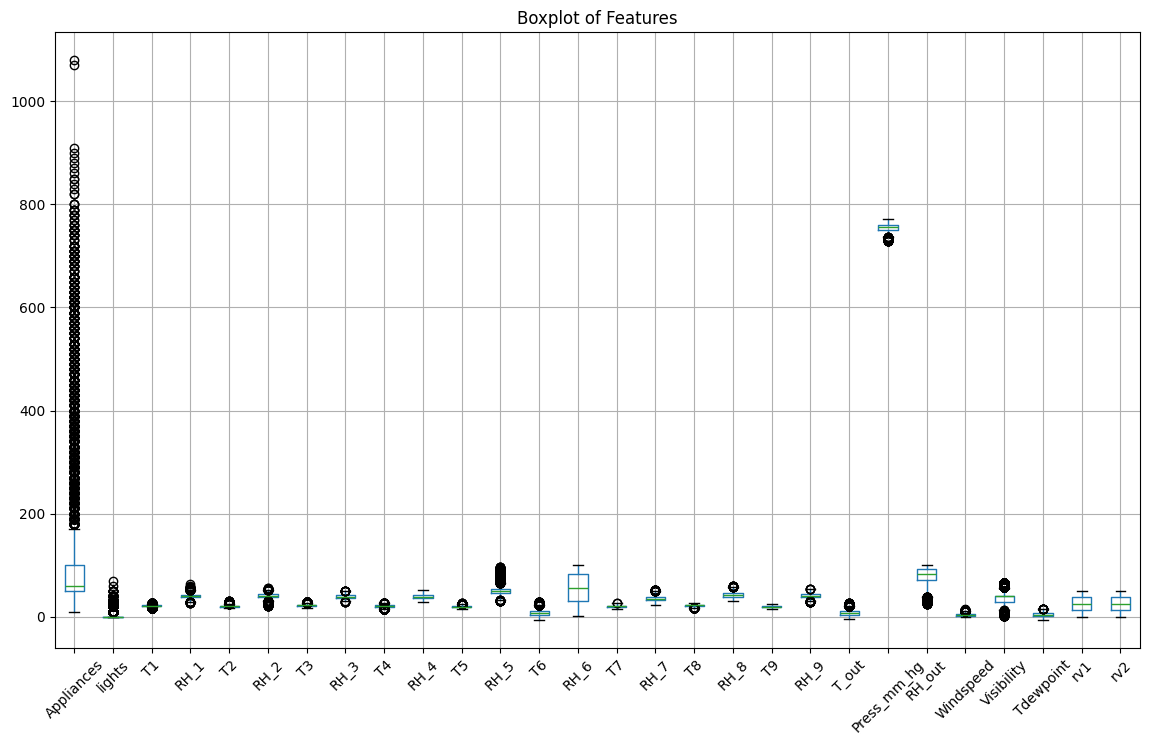

In [21]:
plt.figure(figsize=(14,8))
df.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Features")
plt.show()

### Correlation Matrix

This helps identify:

- Strong predictors of Heating Load
- Multicollinearity

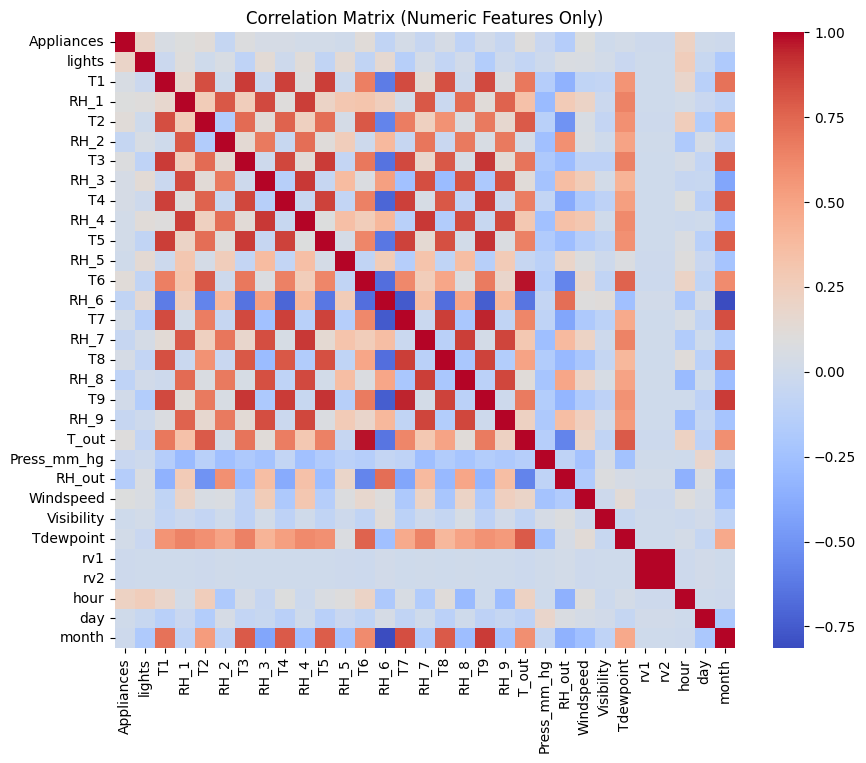

In [28]:
plt.figure(figsize=(10,8))

numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

### Multicollinearity Check using Manual VIF (Without statsmodels)

We compute VIF using sklearn:

VIF = 1 / (1 - R²)

Procedure:
- Regress each feature on remaining features
- Compute R²
- Calculate VIF

In [31]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_values = []

    for i in range(X.shape[1]):
        X_other = X.drop(X.columns[i], axis=1)
        y_target = X.iloc[:, i]
        
        model = LinearRegression()
        model.fit(X_other, y_target)
        r2 = model.score(X_other, y_target)
        
        if r2 >= 0.9999:  # Avoid division by zero
            vif = np.inf
        else:
            vif = 1 / (1 - r2)
        
        vif_values.append(vif)

    vif_data["VIF"] = vif_values
    return vif_data
    
# Define features properly
X_features = df.drop("Appliances", axis=1)
calculate_vif(X_features)

,Feature,VIF
0,lights,1.306136
1,T1,20.157642
2,RH_1,16.239232
3,T2,28.950406
4,RH_2,21.922706
5,T3,10.761402
6,RH_3,11.255139
7,T4,9.852436
8,RH_4,17.776234
9,T5,10.636084


### Missing Value Handling

We check and apply mean imputation if required.

In [32]:
df.isnull().sum()

imputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

### Feature Scaling

Regularization requires scaling.

We use StandardScaler.

In [34]:
scaler = StandardScaler()

X = df_imputed.drop("Appliances", axis=1)
y = df_imputed["Appliances"]

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Linear Regression
linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred_lin = linear.predict(X_test)

lin_mse = mean_squared_error(y_test, y_pred_lin)
lin_rmse = np.sqrt(lin_mse)
lin_r2 = r2_score(y_test, y_pred_lin)

lin_mse, lin_rmse, lin_r2

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, y_pred_ridge)

ridge_mse, ridge_rmse, ridge_r2

# Elastic Net
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train, y_train)

y_pred_elastic = elastic.predict(X_test)

elastic_mse = mean_squared_error(y_test, y_pred_elastic)
elastic_rmse = np.sqrt(elastic_mse)
elastic_r2 = r2_score(y_test, y_pred_elastic)

elastic_mse, elastic_rmse, elastic_r2

# K-fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

ridge_cv_scores = cross_val_score(
    Ridge(alpha=1.0),
    X_scaled,
    y,
    scoring="neg_mean_squared_error",
    cv=kfold
)

ridge_cv_mse = -ridge_cv_scores.mean()
ridge_cv_rmse = np.sqrt(ridge_cv_mse)

ridge_cv_mse, ridge_cv_rmse

(np.float64(8766.044009450885), np.float64(93.62715423129598))

### Improvement Calculation

To evaluate model performance comprehensively, we compare models using multiple metrics:

• MSE  
• RMSE  
• R² Score  
• Improvement %

Each metric highlights different aspects of performance.

---

#### Mean Squared Error (MSE)

Measures average squared prediction error.
Lower MSE → Better model.
Penalizes large errors heavily.

---

#### Root Mean Squared Error (RMSE)

RMSE = √MSE

Advantage:
- Same units as target variable.
- Easier to interpret than MSE.

If RMSE = 25,
it means average prediction error is 25 units.

---

#### R² Score (Coefficient of Determination)

R² = 1 − (SS_res / SS_tot)

Interpretation:

• R² = 1 → Perfect prediction  
• R² = 0 → Model predicts mean only  
• R² < 0 → Worse than mean model  

Higher R² indicates better explanatory power.

---

#### Improvement %

Measures percentage reduction in error compared to baseline.

Helps justify whether regularization improved performance.

---


In [35]:
ridge_improve = ((lin_mse - ridge_mse) / lin_mse) * 100
elastic_improve = ((lin_mse - elastic_mse) / lin_mse) * 100
ridge_cv_improve = ((lin_mse - ridge_cv_mse) / lin_mse) * 100

ridge_improve, elastic_improve, ridge_cv_improve

(0.0025093580274740566, -1.1633440992326347, np.float64(-5.763746787325281))

When analyzing the final comparison table:

1. Identify the lowest MSE.
2. Confirm with RMSE.
3. Check if R² improved.
4. Verify positive improvement %.

The model with:
- Lowest MSE
- Lowest RMSE
- Highest R²
- Highest positive Improvement %

is considered the best-performing model.


In [37]:
comparison = pd.DataFrame({
    "Model": ["Linear", "Ridge", "ElasticNet", "Ridge (CV)"],
    "MSE": [lin_mse, ridge_mse, elastic_mse, ridge_cv_mse],
    "RMSE": [lin_rmse, ridge_rmse, elastic_rmse, ridge_cv_rmse],
    "R2 Score": [lin_r2, ridge_r2, elastic_r2, None],
    "Improvement (%)": [0, ridge_improve, elastic_improve, ridge_cv_improve]
})

comparison

,Model,MSE,RMSE,R2 Score,Improvement (%)
0,Linear,8288.325892,91.040243,0.171755,0.000000
1,Ridge,8288.117908,91.039101,0.171776,0.002509
2,ElasticNet,8384.747642,91.568268,0.162119,-1.163344
3,Ridge (CV),8766.044009,93.627154,NaN,-5.763747


### Result and Conclusion

Based on the comparison table:

"The Ridge Regression model achieved the lowest MSE and highest R² score among all models. The percentage improvement over the baseline Linear Regression model confirms that regularization effectively reduced prediction error and mitigated multicollinearity."

If Elastic Net performs best, replace Ridge accordingly.